<a href="https://colab.research.google.com/github/kirill-kozlitin/Netology_projects/blob/main/%D0%94%D0%97_2%20%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Градиентный спуск

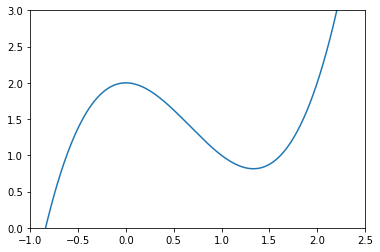

In [ ]:
f = lambda x: x**3-2*x**2+2
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

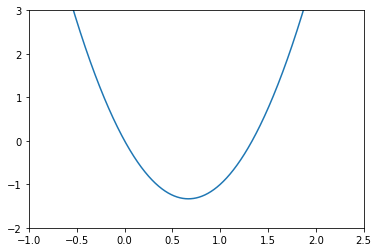

In [ ]:
f_prime = lambda x: 3*x**2-4*x
x = np.linspace(-1,2.5,1000)
plt.plot(x,f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Метод градиентного спуска

In [ ]:
lr = 0.1
points = [2]
n_epochs = 15

In [ ]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [ ]:
y_points = [f(p) for p in points]


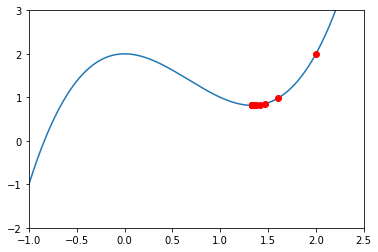

In [ ]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Практический пример

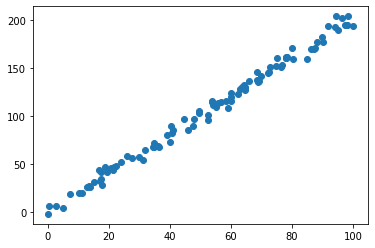

In [ ]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

<img src="gradientdescentofmsetable.png"/>

## Применим метод градиентного спуска

In [ ]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [ ]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [ ]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    

In [ ]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

In [ ]:
theta0 = 1
theta1 = 1
for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0053316085468724 t1: 1.3613388862540106 cost: 761.5532986815939
t0: 1.0087498168142321 t1: 1.5931521270673725 cost: 320.3972211901695
t0: 1.0109405030626457 t1: 1.741869535923422 cost: 138.82925972743044
t0: 1.0123436853633507 t1: 1.8372776772192088 cost: 64.1007761569218
t0: 1.0132416527378059 t1: 1.898485811837248 cost: 33.344544517331954
t0: 1.0138155047745168 t1: 1.9377532875360952 cost: 20.686107607019846
t0: 1.0141814240327174 t1: 1.962944961485747 cost: 15.476235636658764
t0: 1.0144139462260529 t1: 1.9791064510814098 cost: 13.331992406965082
t0: 1.014560888967125 t1: 1.989474719734947 cost: 12.449479410063264
t0: 1.0146529291484334 t1: 1.9961264076885803 cost: 12.086260598801223
t0: 1.0147097472116033 t1: 2.000393761911741 cost: 11.936769289851606
t0: 1.0147439689394622 t1: 2.0031314716045494 cost: 11.875242465217298
t0: 1.01476369427179 t1: 2.004887853742431 cost: 11.849919453468022
t0: 1.0147741196407865 t1: 2.0060146753835166 cost: 11.839496956149445
t0: 1.0147785787635

In [ ]:
cost_function(X,Y,10,10)

118306.37634179303

In [ ]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)    

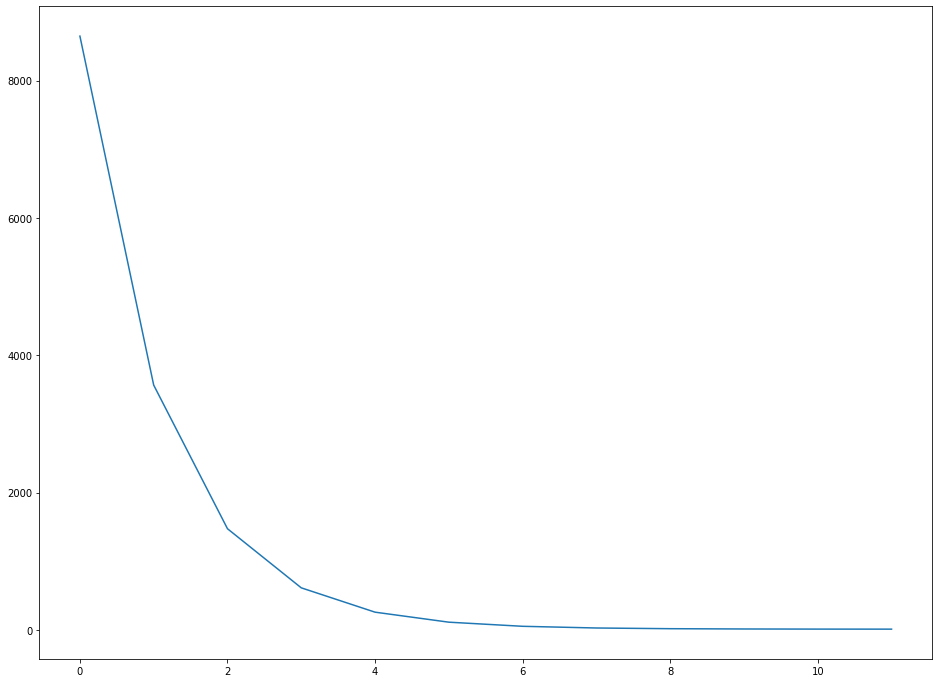

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

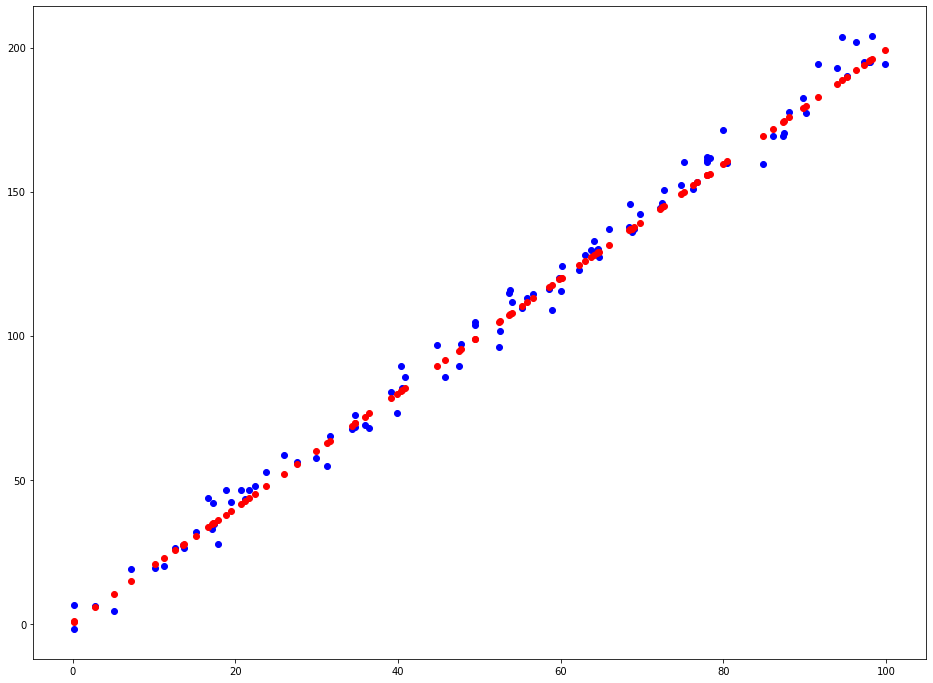

In [ ]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

In [ ]:
params

array([0.42000507, 2.0061483 ])

## Метод стохастического градиентного спуска

In [ ]:
EPOCHS = 120
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    # Для статистики считаем общее предсказание и функцию потерь
    predictions = params[0] + params[1] * X
    preds.append(predictions)
    
    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    i = np.random.choice(len(X))
    current_prediction = params[0] + params[1] * X[i]

    params[0] -= LEARNING_RATE * (current_prediction - Y[i])
    params[1] -= LEARNING_RATE * ((current_prediction - Y[i]) * X[i])

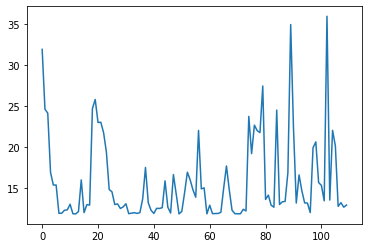

In [ ]:
plt.plot(costs[10:])
plt.show()

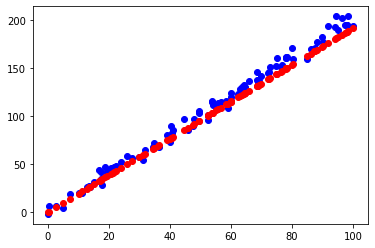

In [ ]:
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

## Broyden-Fletcher-Goldfarb-Shanno algorithm (BFGS)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
def square(X):
    return X[0]**2 + X[1]**2

phi_m = np.linspace(-2, 2, 100)
phi_p = np.linspace(-2, 2, 100)
X,Y = np.meshgrid(phi_p, phi_m)
XY = np.hstack((X.reshape(-1, 1), Y.reshape(-1,1)))
Z = np.array([square(t) for t in XY]).reshape(X.shape)

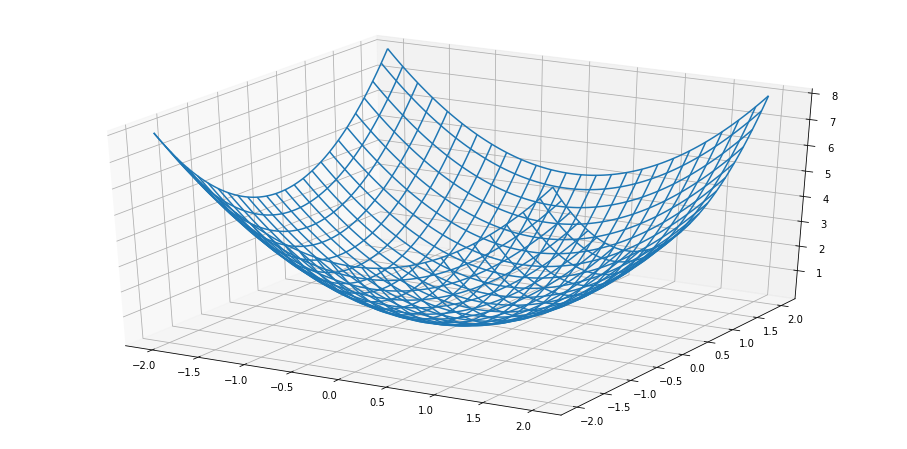

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
# Add a color bar which maps values to colors.

plt.show()

In [ ]:
from scipy.optimize import minimize

In [ ]:
res = minimize(square, np.array((1,1)), method='BFGS')

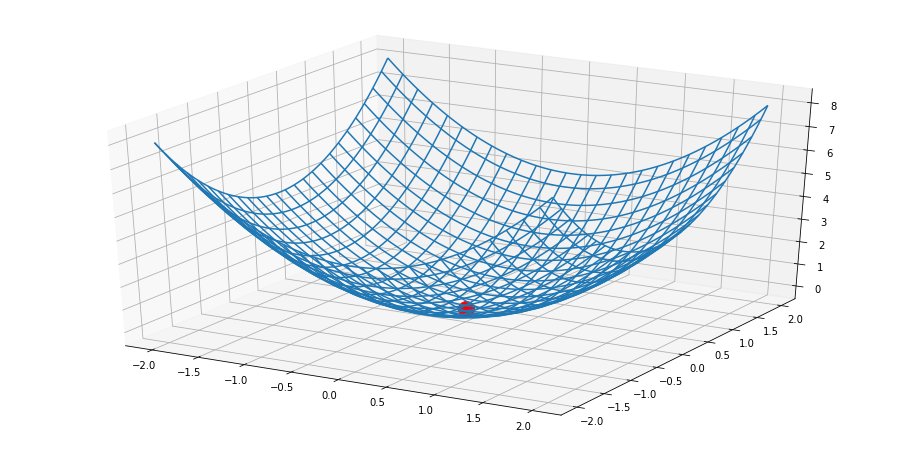

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.scatter(res.x[0].reshape(-1, 1), res.x[1].reshape(-1, 1), np.array([square(res.x)]).reshape(-1,1),
          c='red', s=256)

plt.show()

## ДЗ


Логистическая регрессия

Попробуем реализовать алгоритм классификации основанный на логистической регрессии. Для этого, напишем себе руками игрушечные данные, которые попробуем классифицировать:

In [ ]:
X = np.array([-12, -21, 0.5, 7, -3.2, 4, 15, -3, 1, -8])
y = np.array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0])

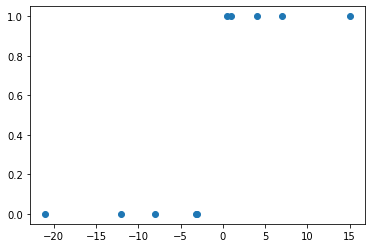

In [ ]:
plt.scatter(X, y)

Данные есть. Как теперь по ним построить логистическую регрессию? Вспомним ее формулу:

$$ f(x) = \frac{1}{(1 + e^{-(a + bx)})} $$

Наша задача состоит в подборе таких коэффициентов $ a $ и $ b $, чтобы ошибка классификации была минимальна. То есть: 

$$ \sum{(\hat{y}-f(x))} -> min $$

У функции описанной выше нет производной. Поэтому, воспользуемся другой, функцией Logistic loss:

$$ L(y, f) = log(1 + e^{-2yf}) $$

Запишем ее производную (градиент): 

$$ r_{i} = \frac{2*y_{i}}{1 + exp(2*y_{i}*\hat{f}(x_{i})} $$

Теперь переведем все это в машинный формат:

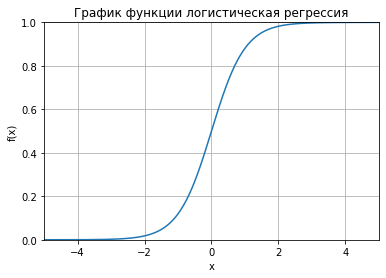

In [ ]:
f = lambda x: 1 / (1 + np.exp(-2*x))
x = np.linspace(-10,10,1000)
plt.plot(x,f(x))
plt.xlim([-5,5])
plt.ylim([0,1])
plt.title('График функции логистическая регрессия')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

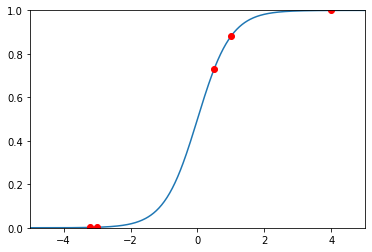

In [ ]:
plt.plot(x,f(x))
plt.plot(X, f(X), 'ro')
plt.xlim([-5,5])
plt.ylim([0,1])

x = np.linspace(-10,10,1000)

predictions = np.where(f(x) > 0.5, 1, 0)

Дальше я застрял. Помогите плиз с рассуждениями

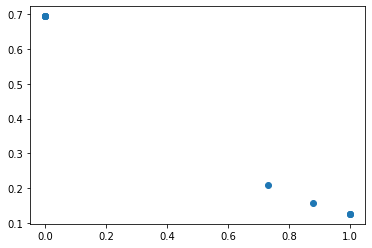

In [ ]:
errors = np.multiply(x, predictions)
errors
f_error = lambda error: np.log(1+np.exp(-2*error))
# x = np.linspace(-10,10,1000)
# plt.scatter(errors,f_error(errors))
plt.plot(errors,f_error(errors))
# plt.xlim([-10,10])
# plt.ylim([-5,5])
# plt.show()

## здесь пока что-то непонятное

In [ ]:
# f_prime = lambda x: 3*x**2-4*x
def f_prime(y, f_x):
  return (2*y) / (1 + np.exp(2*y*f_x))

f_prime(y, f(X))
# x = np.linspace(-1,2.5,1000)
# plt.plot(x,f_prime(x))
# plt.xlim([-1,2.5])
# plt.ylim([-2,3])
# plt.show()

array([0.        , 0.        , 0.37628745, 0.23840619, 0.        ,
       0.23854672, 0.23840584, 0.        , 0.29318159, 0.        ])

In [ ]:
lr = 0.1
points = [2]
n_epochs = 15